In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('total.csv')
rationales = df[['if_else', 'contrastive', 'neutral', 'consensus', 'causal', 'comparative', 'historical', 'ucs_score', 'wucs_score', 'consensus_wucs_score']]

In [51]:
performance = {

    'if_else': 56.24,
    'contrastive': 68.26,
    'neutral': 11.12,
    'consensus': 68.43,
    'causal': 63.92,
    'comparative': 64.2,
    'historical': 0.11,
    'ucs_score': 0.04,
    'wucs_score': 62.94,
    'consensus_wucs_score': 9
}

In [52]:
# plot average length of rationales
length_dict = {}
for col in rationales.columns:
    length_dict[col] = rationales[col].apply(lambda x: len(x)).mean()

In [76]:
temp = np.array(list(performance.values())) / np.array(list(length_dict.values()))

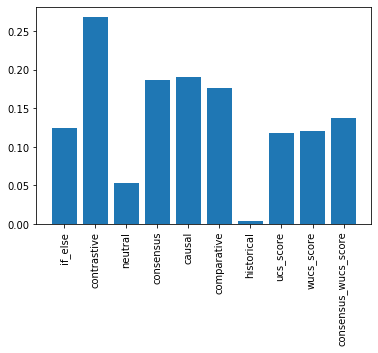

In [78]:
# plot performance
plt.bar(range(len(performance)), temp, align='center')
plt.xticks(range(len(performance)), list(performance.keys()), rotation=90);

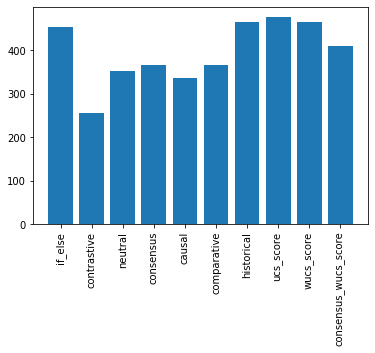

In [77]:
# plot average length of rationales
plt.bar(range(len(length_dict)), list(length_dict.values()), align='center')
plt.xticks(range(len(length_dict)), list(length_dict.keys()), rotation=90);



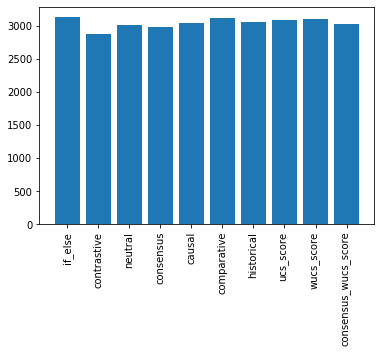

In [34]:
# plot quantity of row less than mean each rationales length
quantity_dict = {}

for col in rationales.columns:
    quantity_dict[col] = len(rationales[rationales[col].apply(lambda x: len(x)) <= length_dict[col]])

plt.bar(range(len(quantity_dict)), list(quantity_dict.values()), align='center')
plt.xticks(range(len(quantity_dict)), list(quantity_dict.keys()), rotation=90);


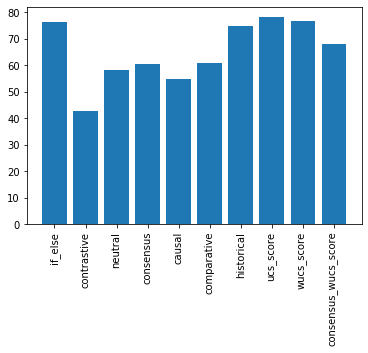

In [35]:
# number of words in each rationale
word_dict = {}
for col in rationales.columns:
    word_dict[col] = rationales[col].apply(lambda x: len(x.split())).mean()

plt.bar(range(len(word_dict)), list(word_dict.values()), align='center')
plt.xticks(range(len(word_dict)), list(word_dict.keys()), rotation=90);

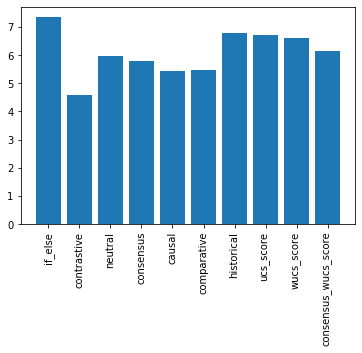

In [36]:
# number of sentences in each rationale
sentence_dict = {}
for col in rationales.columns:
    sentence_dict[col] = rationales[col].apply(lambda x: len(x.split('.'))).mean()

plt.bar(range(len(sentence_dict)), list(sentence_dict.values()), align='center')
plt.xticks(range(len(sentence_dict)), list(sentence_dict.keys()), rotation=90);

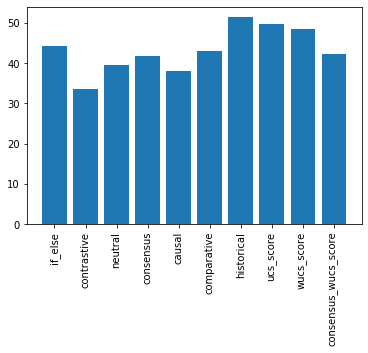

In [37]:
# number of unique words in each rationale
unique_dict = {}
for col in rationales.columns:
    unique_dict[col] = rationales[col].apply(lambda x: len(set(x.split()))).mean()

plt.bar(range(len(unique_dict)), list(unique_dict.values()), align='center')
plt.xticks(range(len(unique_dict)), list(unique_dict.keys()), rotation=90);

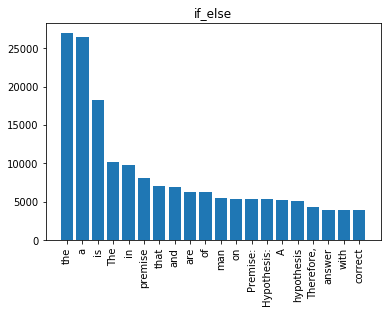

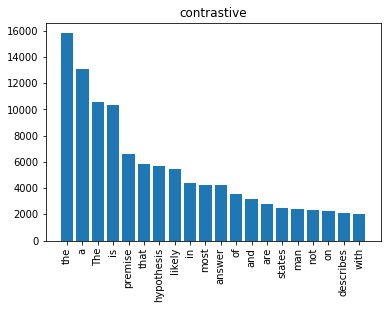

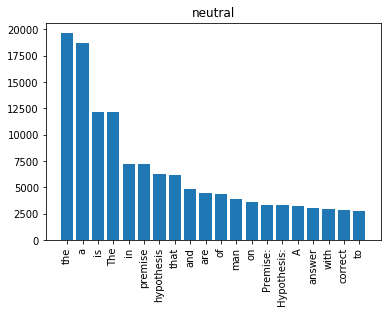

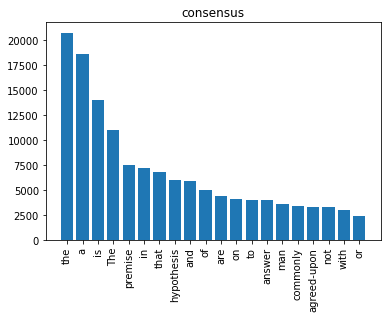

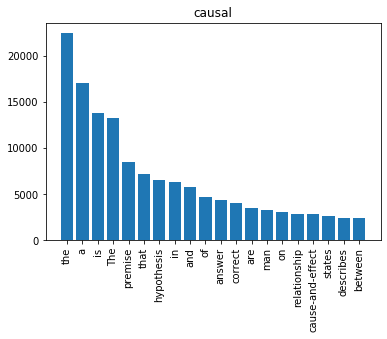

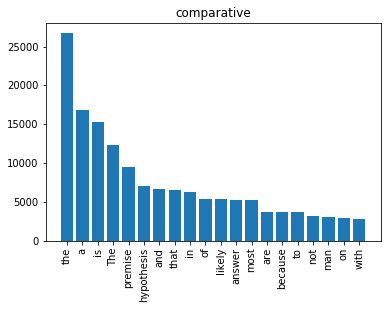

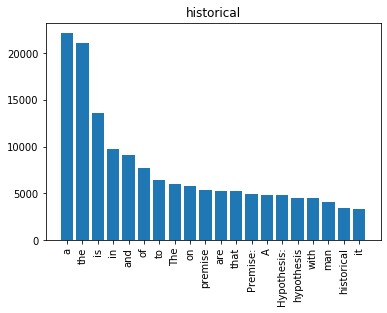

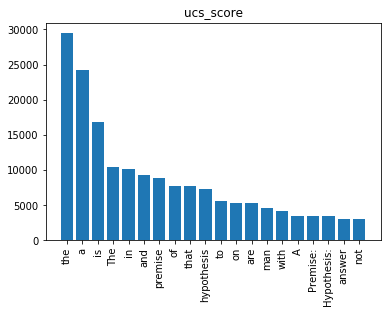

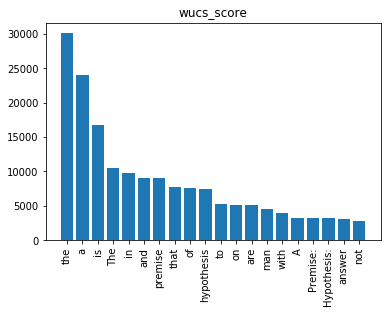

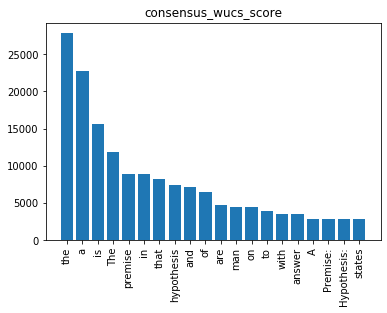

In [40]:
# bigram frequency in each rationale
from collections import Counter
bigram_dict = {}
for col in rationales.columns:
    bigram_dict[col] = Counter([i for i in rationales[col].apply(lambda x: x.split()).sum()]).most_common(20)

# trigram frequency in each rationale
# trigram_dict = {}
# for col in rationales.columns:
#     trigram_dict[col] = Counter([i for i in rationales[col].apply(lambda x: x.split()).sum()]).most_common(20)

# plot bigram frequency in each rationale
for col in rationales.columns:
    plt.bar([i[0] for i in bigram_dict[col]], [i[1] for i in bigram_dict[col]], align='center')
    plt.xticks(range(len(bigram_dict[col])), [i[0] for i in bigram_dict[col]], rotation=90);
    plt.title(col)
    plt.show()

# # plot trigram frequency in each rationale
# for col in rationales.columns:
#     plt.bar([i[0] for i in trigram_dict[col]], [i[1] for i in trigram_dict[col]], align='center')
#     plt.xticks(range(len(trigram_dict[col])), [i[0] for i in trigram_dict[col]], rotation=90);
#     plt.title(col)
#     plt.show()
